# Analysis of rating, revenue, and reviews

In [1]:
import pandas as pd

'''
movies = pd.read_csv('movies_info_combined.csv')

revenue = pd.read_csv('revenue.csv')
revenue = revenue[['Year', 'Movie', 'Domestic_boxoffice']]
revenue['Domestic_boxoffice'] = revenue['Domestic_boxoffice'].str.replace('$', '')
revenue['Domestic_boxoffice'] = revenue['Domestic_boxoffice'].str.replace(',', '')
revenue = revenue.dropna()
revenue['Domestic_boxoffice'] = pd.to_numeric(revenue['Domestic_boxoffice']).astype(int)

movies_all = movies.merge(revenue, how='inner', left_on='movie', right_on='Movie')
movies_all.to_csv('movies_info_combined_all.csv')
'''

movies_all = pd.read_csv('movies_info_combined_all.csv')

## 1. Critic score vs user rating (overall and by genre)

In [2]:
import numpy as np

genres_all = []
for genre in movies_all['genre'].unique():
    if type(genre) is str:
        genres_all += genre.split(',')

genres_all = list(set(genres_all))

def get_movies_by_genre(genre):
    return movies_all[movies_all['genre'].str.contains(genre, na=False)]

genres_skip = []
for genre in genres_all:
    if len(get_movies_by_genre(genre)) < 5:
        genres_skip.append(genre)
        
genres_all = [genre for genre in genres_all if genre not in genres_skip]

In [3]:
genres_all

['Family',
 'Horror',
 'Sport',
 'History',
 'Thriller',
 'Animation',
 'Drama',
 'War',
 'Music',
 'Sci-Fi',
 'Biography',
 'Fantasy',
 'Documentary',
 'Mystery',
 'Comedy',
 'Western',
 'Romance',
 'Musical',
 'Action',
 'Adventure',
 'Crime']

In [4]:
# For continuous values, regression analysis

import statsmodels.api as sm
import matplotlib.pyplot as plt

def reg_analysis(df, X_name, y_name):
    X = df[X_name]
    y = df[y_name]
    
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())

    # Residual plots
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].scatter(model.predict(X), model.resid)
    ax[0].set_xlabel('Fitted values')
    ax[0].set_ylabel('Residuals')
    ax[0].set_title('Residual plot')
    sm.qqplot(model.resid, ax=ax[1])
    ax[1].set_title('Normal Q-Q plot')
    plt.show()

    corr = df[X_name].corr(df[y_name])
    print('R-squared value:', model.rsquared)
    print('p-values:', model.pvalues[1])
    print('correlation coefficient:', corr)
    
    return model.rsquared, model.pvalues[1], corr

                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     572.8
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          3.61e-101
Time:                        21:29:26   Log-Likelihood:                -1092.2
No. Observations:                1041   AIC:                             2188.
Df Residuals:                    1039   BIC:                             2198.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3564      0.091     48.060      0.0

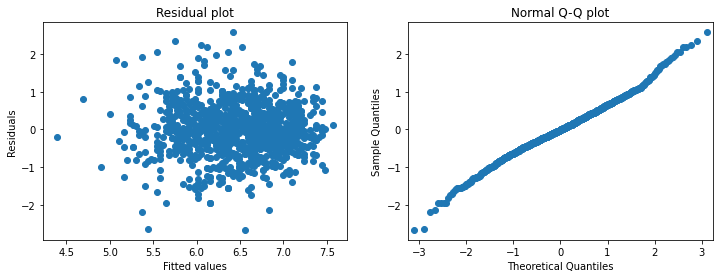

R-squared value: 0.3553592434730135
p-values: 3.6142368636856124e-101
correlation coefficient: 0.5961201585863487


(0.3553592434730135, 3.6142368636856124e-101, 0.5961201585863487)

In [5]:
# overall
reg_analysis(movies_all, 'metascore', 'imdb_user_rating')

Conclusion:

R squared 0.355 meaning 35.5% of the variation in the imdb user rating can be explained by the metascore.

p value < 0.05, so the regression model is significant.

Correlation coefficient of 0.596 indicates a moderately strong positive correlation.

In [6]:
def reg_by_genre(X_name, y_name):
    genre_dict = {'genre':[], 'r_squared':[], 'p_value':[], 'corr':[], 'len':[]}
    
    for genre in genres_all:
        movies_by_genre = get_movies_by_genre(genre)
        genre_dict['len'].append(len(movies_by_genre))
        genre_dict['genre'].append(genre)
        
        print('---------------'+genre+'---------------')
        
        rsq, pval, corr = reg_analysis(movies_by_genre, X_name, y_name)
        
        genre_dict['r_squared'].append(rsq)
        genre_dict['p_value'].append(pval)
        genre_dict['corr'].append(corr)
        
        print('-----------------------------------')
        
    return genre_dict

---------------Family---------------
                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     34.07
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           1.41e-07
Time:                        21:29:33   Log-Likelihood:                -84.397
No. Observations:                  74   AIC:                             172.8
Df Residuals:                      72   BIC:                             177.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

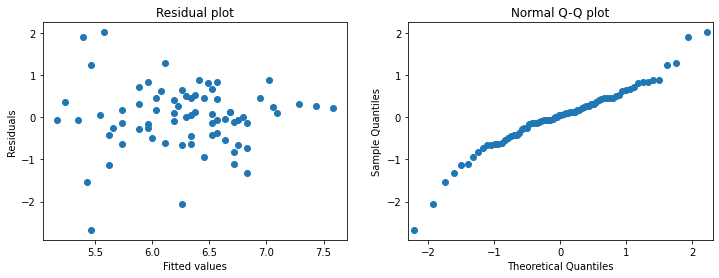

R-squared value: 0.32120474379077646
p-values: 1.4103605197346298e-07
correlation coefficient: 0.5667492777152667
-----------------------------------
---------------Horror---------------
                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     61.65
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           5.45e-13
Time:                        21:29:33   Log-Likelihood:                -190.79
No. Observations:                 163   AIC:                             385.6
Df Residuals:                     161   BIC:                             391.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef  

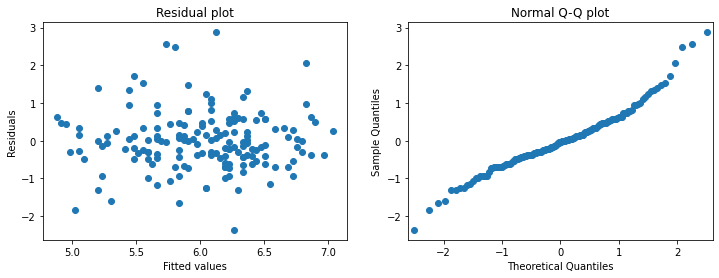

R-squared value: 0.2768805817647615
p-values: 5.450176288287573e-13
correlation coefficient: 0.5261944334224388
-----------------------------------
---------------Sport---------------
                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     10.76
Date:                Fri, 07 Apr 2023   Prob (F-statistic):            0.00393
Time:                        21:29:33   Log-Likelihood:                -19.030
No. Observations:                  21   AIC:                             42.06
Df Residuals:                      19   BIC:                             44.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    s

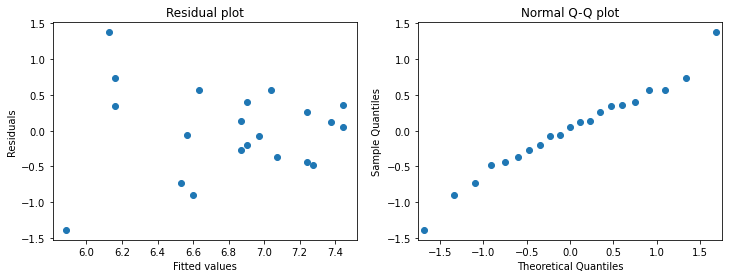

R-squared value: 0.36166062597804893
p-values: 0.003930247555157768
correlation coefficient: 0.6013822627730628
-----------------------------------
---------------History---------------
                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     75.06
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           8.50e-12
Time:                        21:29:33   Log-Likelihood:                -38.826
No. Observations:                  56   AIC:                             81.65
Df Residuals:                      54   BIC:                             85.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef   

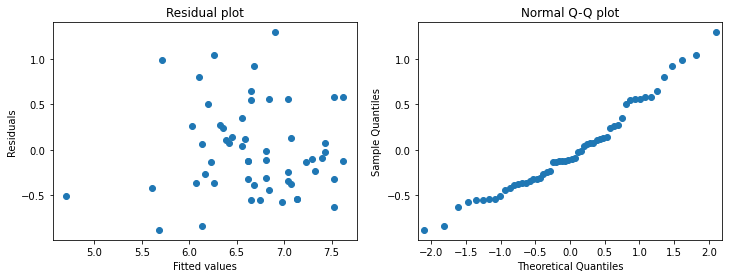

R-squared value: 0.5815875090356182
p-values: 8.498328608623937e-12
correlation coefficient: 0.7626188491216422
-----------------------------------
---------------Thriller---------------
                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     107.5
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           2.46e-21
Time:                        21:29:34   Log-Likelihood:                -292.51
No. Observations:                 264   AIC:                             589.0
Df Residuals:                     262   BIC:                             596.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef  

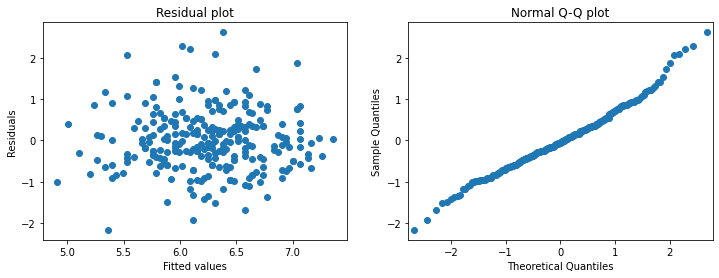

R-squared value: 0.29100826884159614
p-values: 2.4575112499554273e-21
correlation coefficient: 0.539451822539878
-----------------------------------
---------------Animation---------------
                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     75.69
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           7.43e-12
Time:                        21:29:34   Log-Likelihood:                -49.168
No. Observations:                  56   AIC:                             102.3
Df Residuals:                      54   BIC:                             106.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef

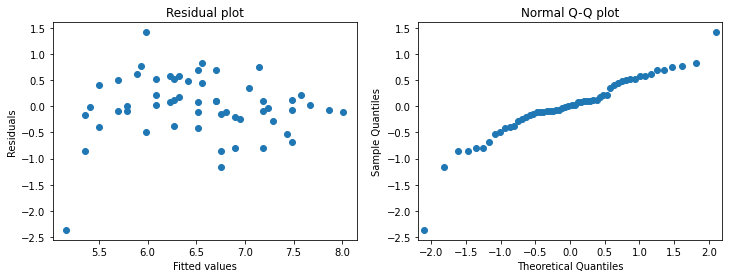

R-squared value: 0.5836349714028094
p-values: 7.431797114532002e-12
correlation coefficient: 0.763960058774547
-----------------------------------
---------------Drama---------------
                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     222.5
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           8.62e-43
Time:                        21:29:34   Log-Likelihood:                -595.11
No. Observations:                 579   AIC:                             1194.
Df Residuals:                     577   BIC:                             1203.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    st

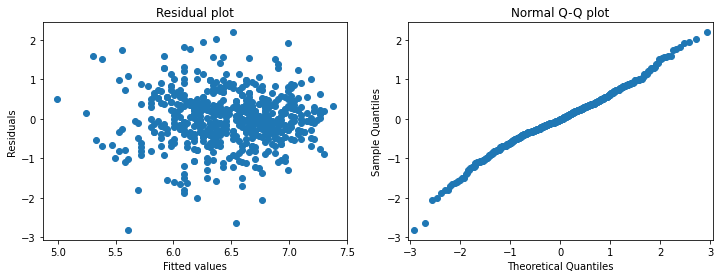

R-squared value: 0.27828383780727084
p-values: 8.624050547956621e-43
correlation coefficient: 0.5275261489322316
-----------------------------------
---------------War---------------
                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     19.31
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           0.000166
Time:                        21:29:34   Log-Likelihood:                -31.069
No. Observations:                  28   AIC:                             66.14
Df Residuals:                      26   BIC:                             68.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    st

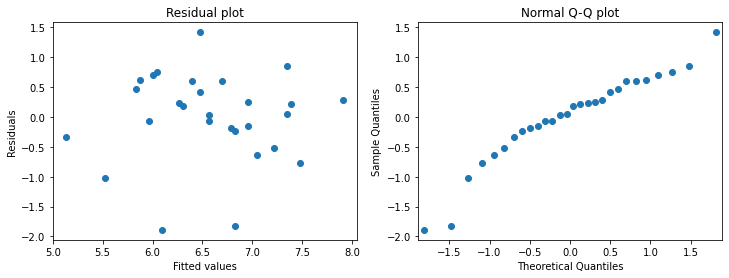

R-squared value: 0.4261244856469658
p-values: 0.0001664138325977279
correlation coefficient: 0.6527821119232402
-----------------------------------
---------------Music---------------
                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     23.92
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           5.69e-06
Time:                        21:29:35   Log-Likelihood:                -87.563
No. Observations:                  76   AIC:                             179.1
Df Residuals:                      74   BIC:                             183.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    s

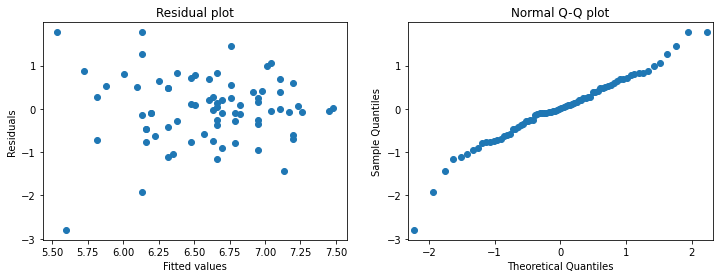

R-squared value: 0.24426177141070549
p-values: 5.694700285258408e-06
correlation coefficient: 0.4942284607453375
-----------------------------------
---------------Sci-Fi---------------
                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     55.68
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           2.04e-11
Time:                        21:29:35   Log-Likelihood:                -118.98
No. Observations:                 113   AIC:                             242.0
Df Residuals:                     111   BIC:                             247.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef   

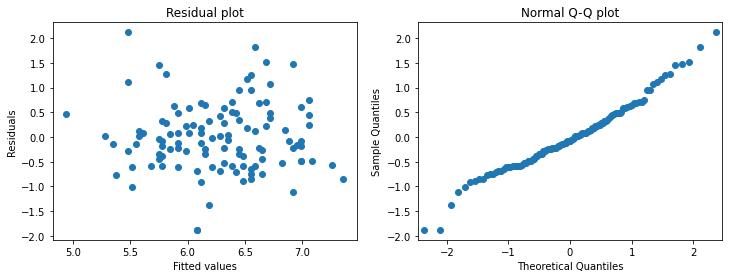

R-squared value: 0.3340458050270375
p-values: 2.042694323758167e-11
correlation coefficient: 0.5779669584215318
-----------------------------------
---------------Biography---------------
                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     46.53
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           8.66e-10
Time:                        21:29:35   Log-Likelihood:                -86.726
No. Observations:                  96   AIC:                             177.5
Df Residuals:                      94   BIC:                             182.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef 

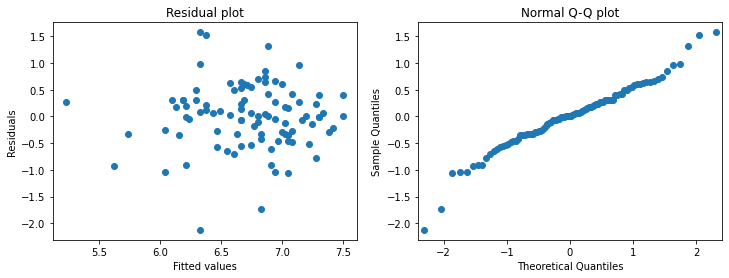

R-squared value: 0.33110437490607225
p-values: 8.657057154081989e-10
correlation coefficient: 0.575416696756422
-----------------------------------
---------------Fantasy---------------
                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     60.99
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           3.80e-12
Time:                        21:29:35   Log-Likelihood:                -119.13
No. Observations:                 111   AIC:                             242.3
Df Residuals:                     109   BIC:                             247.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef   

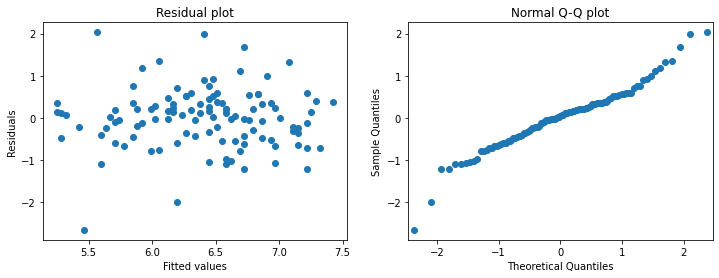

R-squared value: 0.3587819287030034
p-values: 3.8009567128036336e-12
correlation coefficient: 0.5989840805088252
-----------------------------------
---------------Documentary---------------
                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     77.76
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           2.18e-15
Time:                        21:29:35   Log-Likelihood:                -135.04
No. Observations:                 158   AIC:                             274.1
Df Residuals:                     156   BIC:                             280.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 co

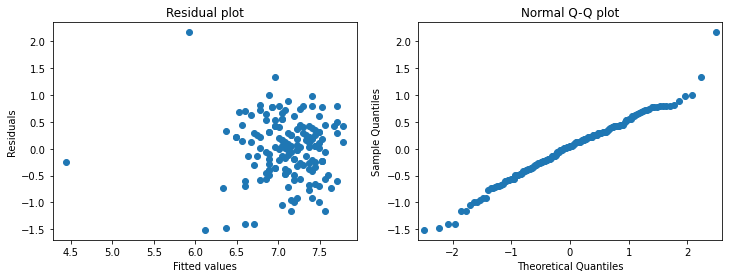

R-squared value: 0.33264816895507743
p-values: 2.1777918585803485e-15
correlation coefficient: 0.5767565942016412
-----------------------------------
---------------Mystery---------------
                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     76.24
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           2.92e-14
Time:                        21:29:36   Log-Likelihood:                -124.26
No. Observations:                 113   AIC:                             252.5
Df Residuals:                     111   BIC:                             258.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef 

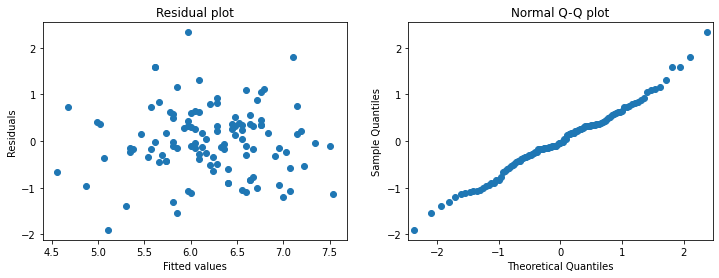

R-squared value: 0.4071725134076706
p-values: 2.920817654792532e-14
correlation coefficient: 0.638100707888395
-----------------------------------
---------------Comedy---------------
                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     164.2
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           1.50e-29
Time:                        21:29:36   Log-Likelihood:                -257.27
No. Observations:                 266   AIC:                             518.5
Df Residuals:                     264   BIC:                             525.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    s

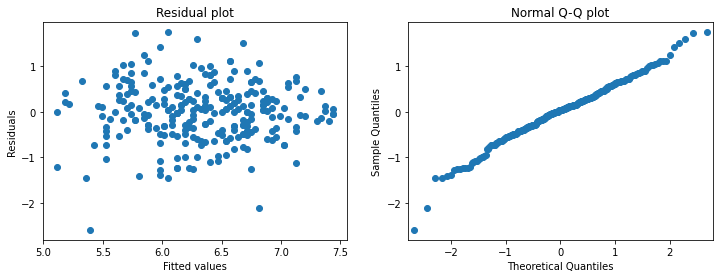

R-squared value: 0.3834150906615108
p-values: 1.4974989453335918e-29
correlation coefficient: 0.6192052088455905
-----------------------------------
---------------Western---------------
                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     8.484
Date:                Fri, 07 Apr 2023   Prob (F-statistic):             0.0172
Time:                        21:29:36   Log-Likelihood:                -6.5812
No. Observations:                  11   AIC:                             17.16
Df Residuals:                       9   BIC:                             17.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef  

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


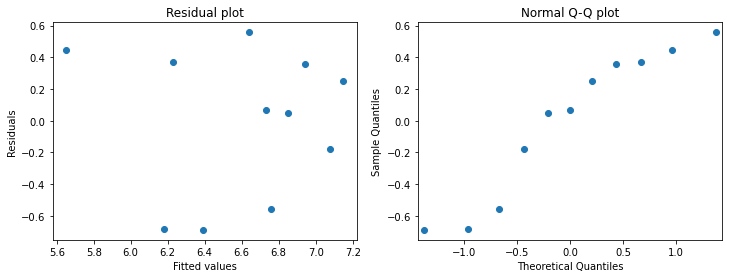

R-squared value: 0.4852577126246369
p-values: 0.017232184637342263
correlation coefficient: 0.6966044161679117
-----------------------------------
---------------Romance---------------
                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     42.35
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           2.13e-09
Time:                        21:29:36   Log-Likelihood:                -109.86
No. Observations:                 116   AIC:                             223.7
Df Residuals:                     114   BIC:                             229.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    

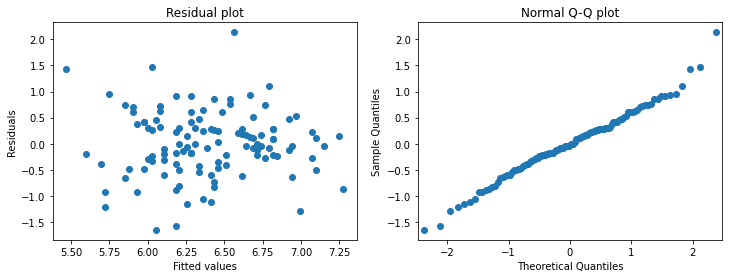

R-squared value: 0.27084357208769494
p-values: 2.125177363756999e-09
correlation coefficient: 0.5204263368505628
-----------------------------------
---------------Musical---------------
                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     15.55
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           0.000573
Time:                        21:29:37   Log-Likelihood:                -29.722
No. Observations:                  27   AIC:                             63.44
Df Residuals:                      25   BIC:                             66.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef  

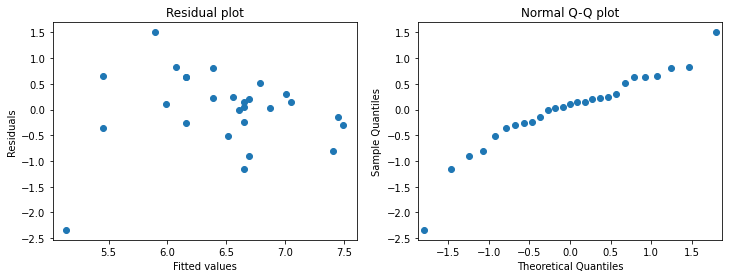

R-squared value: 0.383510849501306
p-values: 0.0005725456277217057
correlation coefficient: 0.6192825280123004
-----------------------------------
---------------Action---------------
                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     101.6
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           3.28e-19
Time:                        21:29:37   Log-Likelihood:                -191.31
No. Observations:                 181   AIC:                             386.6
Df Residuals:                     179   BIC:                             393.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    s

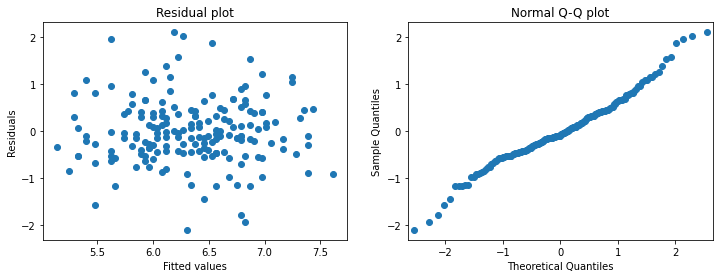

R-squared value: 0.36211451955016516
p-values: 3.279650009343591e-19
correlation coefficient: 0.6017595197004909
-----------------------------------
---------------Adventure---------------
                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     119.5
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           9.88e-21
Time:                        21:29:37   Log-Likelihood:                -146.81
No. Observations:                 149   AIC:                             297.6
Df Residuals:                     147   BIC:                             303.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef

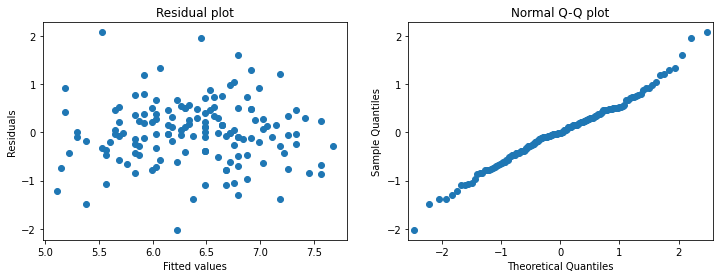

R-squared value: 0.44845189375486894
p-values: 9.875290402689409e-21
correlation coefficient: 0.6696655088586151
-----------------------------------
---------------Crime---------------
                            OLS Regression Results                            
Dep. Variable:       imdb_user_rating   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     91.64
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           2.21e-16
Time:                        21:29:37   Log-Likelihood:                -118.18
No. Observations:                 119   AIC:                             240.4
Df Residuals:                     117   BIC:                             245.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    

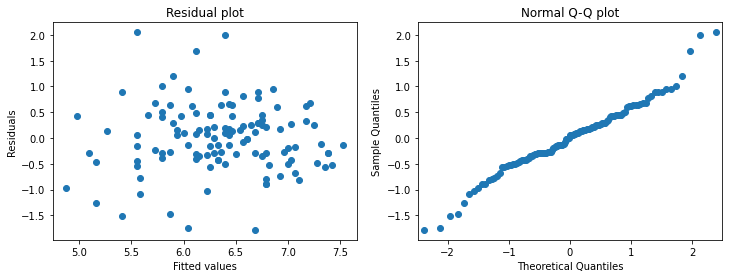

R-squared value: 0.4392340425498533
p-values: 2.2118440001482336e-16
correlation coefficient: 0.6627473444306307
-----------------------------------


In [7]:
genre_dict = reg_by_genre('metascore', 'imdb_user_rating')

In [8]:
pd.DataFrame.from_dict(genre_dict).sort_values('r_squared')

,genre,r_squared,p_value,corr,len
8,Music,0.244262,5.694700e-06,0.494228,76
16,Romance,0.270844,2.125177e-09,0.520426,116
1,Horror,0.276881,5.450176e-13,0.526194,163
6,Drama,0.278284,8.624051e-43,0.527526,579
4,Thriller,0.291008,2.457511e-21,0.539452,264
0,Family,0.321205,1.410361e-07,0.566749,74
10,Biography,0.331104,8.657057e-10,0.575417,96
12,Documentary,0.332648,2.177792e-15,0.576757,158
9,Sci-Fi,0.334046,2.042694e-11,0.577967,113
11,Fantasy,0.358782,3.800957e-12,0.598984,111


## 2. Rating and revenue (overall and by genre)

                            OLS Regression Results                            
Dep. Variable:     Domestic_boxoffice   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     32.46
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           1.58e-08
Time:                        21:29:44   Log-Likelihood:                -20412.
No. Observations:                1041   AIC:                         4.083e+04
Df Residuals:                    1039   BIC:                         4.084e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7.823e+07   1.87e+07  

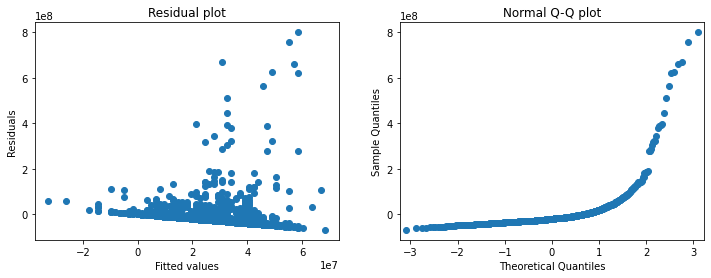

R-squared value: 0.03029573100356009
p-values: 1.5830695671933886e-08
correlation coefficient: 0.174056689051469


(0.03029573100356009, 1.5830695671933886e-08, 0.174056689051469)

In [9]:
# user rating vs revenue overall

reg_analysis(movies_all, 'imdb_user_rating', 'Domestic_boxoffice')

                            OLS Regression Results                            
Dep. Variable:     Domestic_boxoffice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1965
Date:                Fri, 07 Apr 2023   Prob (F-statistic):              0.658
Time:                        22:11:25   Log-Likelihood:                -20428.
No. Observations:                1041   AIC:                         4.086e+04
Df Residuals:                    1039   BIC:                         4.087e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.165e+07   1.06e+07      2.995      0.0

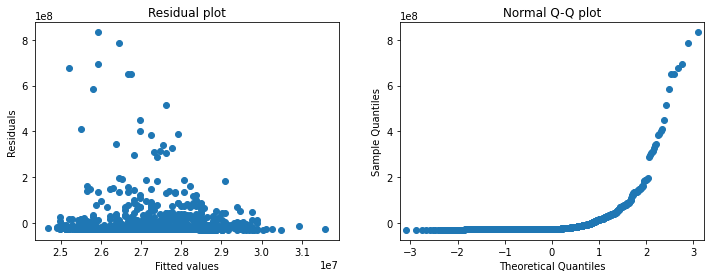

R-squared value: 0.00018909170083758475
p-values: 0.6576503856719311
correlation coefficient: -0.013751061807637332


(0.00018909170083758475, 0.6576503856719311, -0.013751061807637332)

In [47]:
# critic score vs revenue overall

reg_analysis(movies_all, 'metascore', 'Domestic_boxoffice')

In [51]:
# since revenue is not normally distributed, we use Spearman's rank correlation coefficient

from scipy.stats import spearmanr

def spearmanr_analysis(df, X_name, y_name):
    rho, pval = spearmanr(df[X_name], df[y_name])
    return rho, pval

def spearmanr_by_genre(X_name, y_name):
    genre_dict = {'genre':[], 'rho':[], 'p_value':[], 'len':[]}
    
    for genre in genres_all:
        movies_by_genre = get_movies_by_genre(genre)
        genre_dict['len'].append(len(movies_by_genre))
        genre_dict['genre'].append(genre)
        
        rho, pval = spearmanr_analysis(movies_by_genre, X_name, y_name)
        
        genre_dict['rho'].append(rho)
        genre_dict['p_value'].append(pval)
        
        
    return genre_dict

In [45]:
# user rating
spearmanr_analysis(movies_all, 'imdb_user_rating', 'Domestic_boxoffice')

(0.09730166940000637, 0.0016717920661412494)

In [46]:
# critic score
spearmanr_analysis(movies_all, 'metascore', 'Domestic_boxoffice')

(-0.20622165900755599, 1.8425032364742974e-11)

In [54]:
# user rating vs revenue by genre

genre_dict = spearmanr_by_genre('imdb_user_rating', 'Domestic_boxoffice')
pd.DataFrame.from_dict(genre_dict).sort_values('rho')

,genre,rho,p_value,len
15,Western,-0.596812,5.257593e-02,11
2,Sport,0.070451,7.615435e-01,21
5,Animation,0.188594,1.639207e-01,56
4,Thriller,0.202727,9.237921e-04,264
7,War,0.213502,2.753257e-01,28
1,Horror,0.219941,4.786866e-03,163
13,Mystery,0.262638,4.948733e-03,113
20,Crime,0.285575,1.642747e-03,119
16,Romance,0.288770,1.668137e-03,116
6,Drama,0.301374,1.271985e-13,579


In [55]:
# critic score vs revenue by genre

genre_dict = spearmanr_by_genre('metascore', 'Domestic_boxoffice')
pd.DataFrame.from_dict(genre_dict).sort_values('rho')

,genre,rho,p_value,len
2,Sport,-0.427968,0.052942,21
15,Western,-0.400000,0.222868,11
17,Musical,-0.244836,0.218380,27
1,Horror,-0.229646,0.003189,163
8,Music,-0.160823,0.165187,76
11,Fantasy,-0.152771,0.109437,111
5,Animation,-0.151342,0.265528,56
4,Thriller,-0.118084,0.055333,264
6,Drama,-0.067396,0.105221,579
13,Mystery,-0.057445,0.545604,113


## 3. Revenue by genre

In [18]:
movies_all_long = pd.DataFrame()
for genre in genres_all:
    movies_temp = get_movies_by_genre(genre)
    movies_temp.drop(columns=['genre'])
    movies_temp['genre'] = genre
    movies_all_long = movies_all_long.append(movies_temp)
    
movies_all_long

<ipython-input-18-0bd01dded8dd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_temp['genre'] = genre


,id,imdb_user_rating,movie,year,metascore,metacritic_user_rating,release_date,starring,director,genre,runtime,Year,Movie,Domestic_boxoffice
6,tt4468740,7.8,Paddington 2,2018,88,8.3,January 12,"Ben Miller,Ben Whishaw,Brendan Gleeson,Daniel ...",Paul King,Family,103 min,2018,Paddington 2,40891591
34,tt3606756,7.6,Incredibles 2,2018,80,7.8,June 15,"Bob Odenkirk,Brad Bird,Catherine Keener,Craig ...",Brad Bird,Family,118 min,2018,Incredibles 2,608581744
98,tt4701724,6.1,Early Man,2018,68,6.5,February 16,"Eddie Redmayne,Gina Yashere,Johnny Vegas,Kayva...",Nick Park,Family,89 min,2018,Early Man,8267544
124,tt5028340,6.7,Mary Poppins Returns,2018,66,6.6,December 19,"Angela Lansbury,Ben Whishaw,Colin Firth,David ...",Rob Marshall,Family,130 min,2018,Mary Poppins Returns,171958438
135,tt4244998,6.6,Alpha,2018,63,6.6,August 17,"Jens Hultén,Jóhannes Haukur Jóhannesson,Kodi S...",Albert Hughes,Family,96 min,2018,Alpha,35851379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,tt12003946,6.7,Violent Night,2022,55,6.6,December 2,"Alex Hassell,Alexander Elliot,Alexis Louder,Be...",Tommy Wirkola,Crime,101 min,2022,Violent Night,50015575
999,tt11851548,5.9,Orphan: First Kill,2022,54,6.4,August 19,"David Brown,Gwendolyn Collins,Hiro Kanagawa,Is...",William Brent Bell,Crime,99 min,2022,Orphan: First Kill,5413227
1003,tt7657566,6.3,Death on the Nile,2022,52,5.5,February 11,"Adam Garcia,Alaa Safi,Ali Fazal,Annette Bening...",Kenneth Branagh,Crime,127 min,2022,Death on the Nile,45630104
1029,tt10023022,5.6,Clean,2022,44,5.9,January 28,"Aaron Callahan,Adrien Brody,Chandler DuPont,Di...",Paul Solet,Crime,94 min,2022,Clean,318877


In [19]:
genre_grouped = movies_all_long.groupby('genre')
genre_mean_revenue = genre_grouped['Domestic_boxoffice'].mean()

<AxesSubplot:xlabel='genre'>

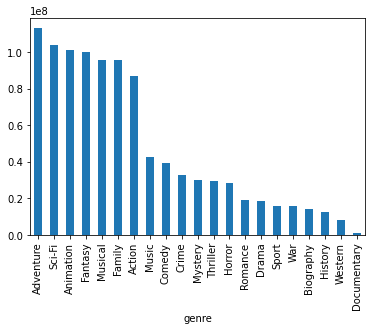

In [24]:
genre_mean_revenue.sort_values(ascending=False).plot(kind='bar')

In [34]:
genre_mean_revenue

genre
Action         8.699324e+07
Adventure      1.132130e+08
Animation      1.009732e+08
Biography      1.418957e+07
Comedy         3.913906e+07
Crime          3.279489e+07
Documentary    9.062757e+05
Drama          1.846809e+07
Family         9.547479e+07
Fantasy        1.001096e+08
History        1.256494e+07
Horror         2.863029e+07
Music          4.269012e+07
Musical        9.589323e+07
Mystery        3.003526e+07
Romance        1.924428e+07
Sci-Fi         1.040944e+08
Sport          1.589094e+07
Thriller       2.930895e+07
War            1.583077e+07
Western        8.315422e+06
Name: Domestic_boxoffice, dtype: float64

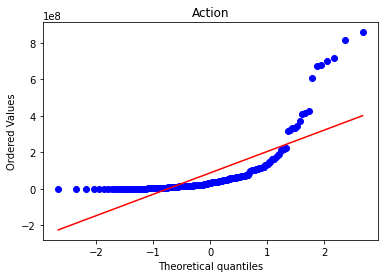

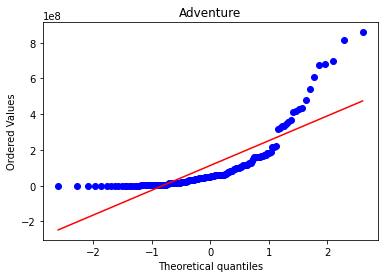

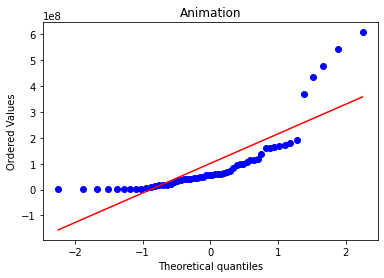

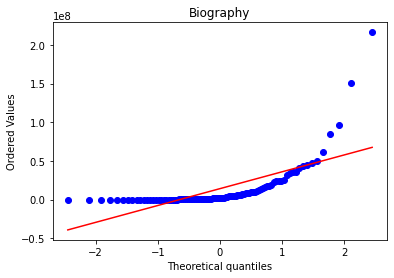

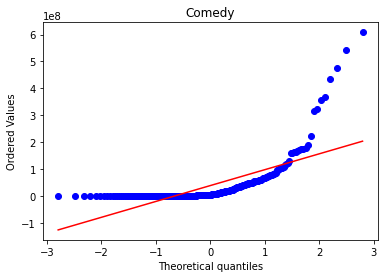

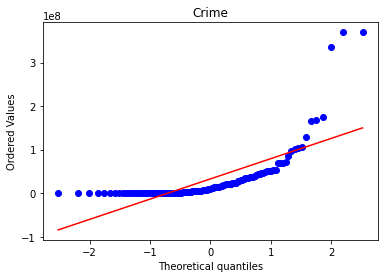

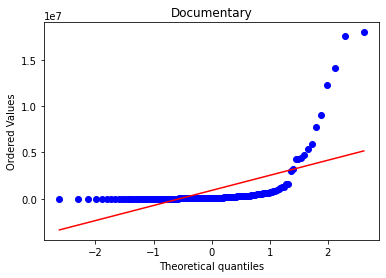

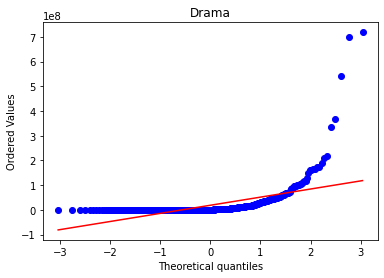

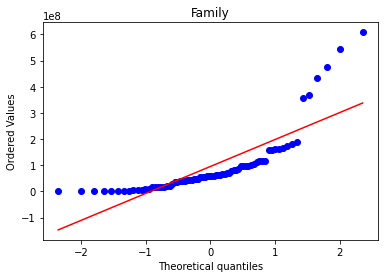

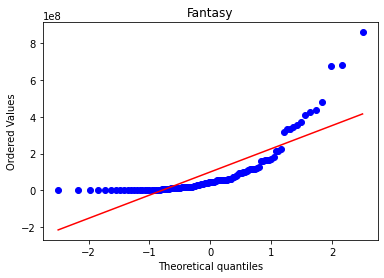

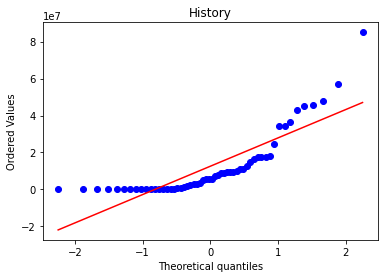

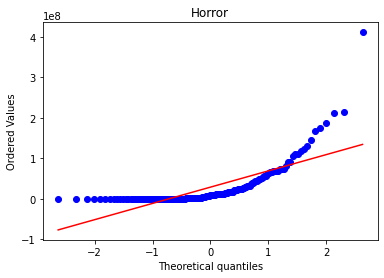

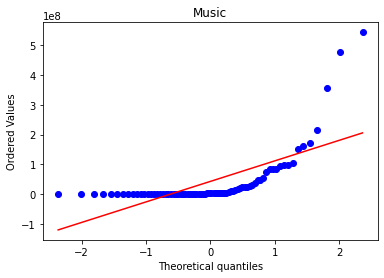

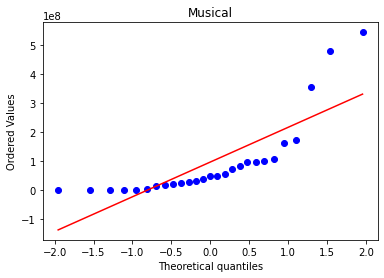

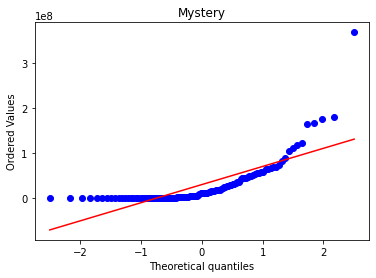

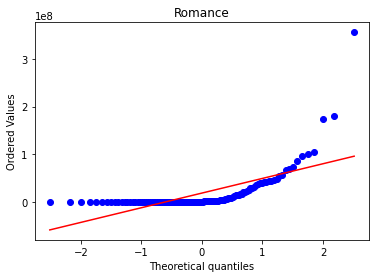

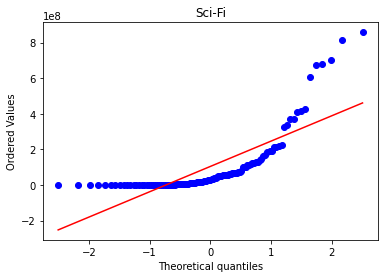

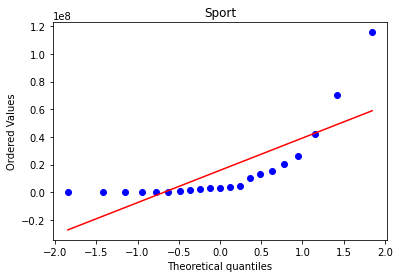

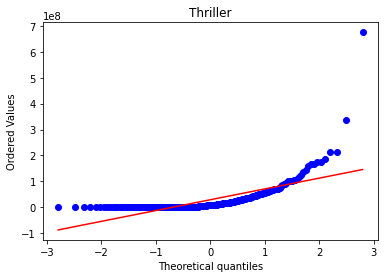

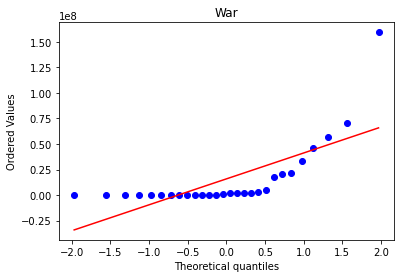

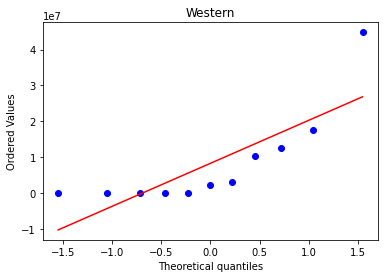

Action 5.113094575771148e-21
Adventure 6.961359467599679e-17
Animation 1.1490088880350413e-09
Biography 1.2643144642962708e-16
Comedy 1.3601525861125086e-26
Crime 7.597389228503542e-18
Documentary 1.711333390769841e-23
Drama 9.020158214858847e-42
Family 1.5193677913027948e-11
Fantasy 1.0918323299776659e-14
History 6.855896295121511e-09
Horror 1.3384369092355018e-19
Music 8.362454744512485e-15
Musical 1.3822532309859525e-06
Mystery 7.971103605903488e-16
Romance 1.2977437073021673e-18
Sci-Fi 1.2788427204680174e-15
Sport 2.6833633910428034e-06
Thriller 6.835256335866518e-27
War 2.7929667467674335e-08
Western 0.00027056847466155887


In [30]:
import scipy.stats as stats
for genre, group in genre_grouped:
    stats.probplot(group['Domestic_boxoffice'], dist="norm", plot=plt)
    plt.title(genre)
    plt.show()

for genre, group in genre_grouped:
    w, p_value = stats.shapiro(group['Domestic_boxoffice'])
    print(genre, p_value)

In [32]:
# Kruskal-Wallis

from scipy.stats import kruskal

stat, p_value = kruskal(*[group['Domestic_boxoffice'] for name, group in genre_grouped])

print('Kruskal-Wallis test:', p_value)

Kruskal-Wallis test: 1.1184061292887532e-108


## 4. Revenue by month (overall and by genre)

In [62]:
movies_all[['month', 'day']] = movies_all['release_date'].str.split(expand=True)
month_to_num = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
movies_all['month'] = movies_all['month'].map(month_to_num)
movies_all.head()

,id,imdb_user_rating,movie,year,metascore,metacritic_user_rating,release_date,starring,director,genre,runtime,Year,Movie,Domestic_boxoffice,month,day
0,tt7905466,8.2,They Shall Not Grow Old,2018,91,8.5,December 17,NaN,Peter Jackson,"History,War,Documentary",99 min,2018,They Shall Not Grow Old,17956913,12,17
1,tt5083738,7.5,The Favourite,2018,91,7.7,November 23,"Basil Eidenbenz,Denise Mack,Emma Delves,Emma S...",Giorgos Lanthimos,"Biography,Drama,History,Comedy",119 min,2018,The Favourite,34366783,11,23
2,tt6217608,7.4,The Rider,2018,91,7.5,April 13,"Brady Jandreau,Cat Clifford,Derrick Janis,Greg...",Chloé Zhao,"Adventure,Drama,Comedy,Romance,Western,Music",104 min,2018,The Rider,2418679,4,13
3,tt7476236,8.0,Minding the Gap,2018,89,8.1,August 17,"Bing Liu,Kiere Johnson,Zack Mulligan",Bing Liu,Documentary,93 min,2018,Minding the Gap,11998,8,17
4,tt7014006,7.4,Eighth Grade,2018,89,7.9,July 13,"Catherine Oliviere,Daniel Zolghadri,Deborah Un...",Bo Burnham,"Drama,Comedy",93 min,2018,Eighth Grade,13539710,7,13


In [63]:
month_grouped = movies_all.groupby('month')
month_mean_revenue = month_grouped['Domestic_boxoffice'].mean()

<AxesSubplot:xlabel='month'>

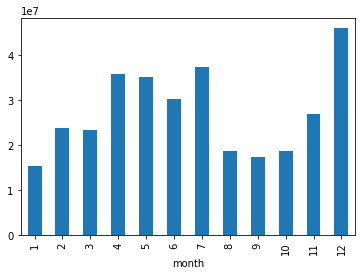

In [65]:
month_mean_revenue.plot(kind='bar')

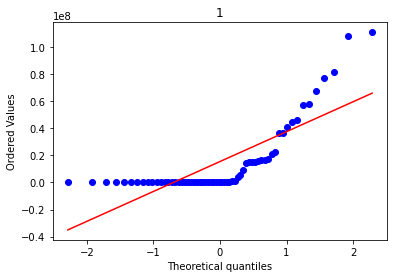

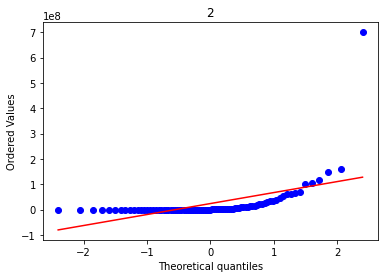

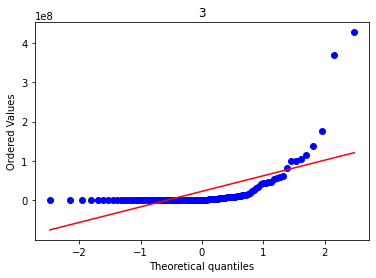

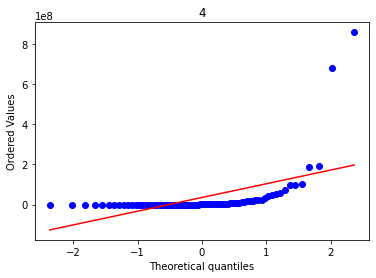

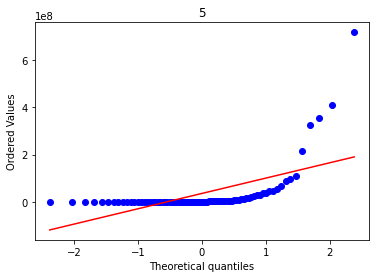

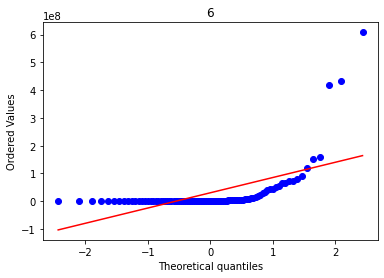

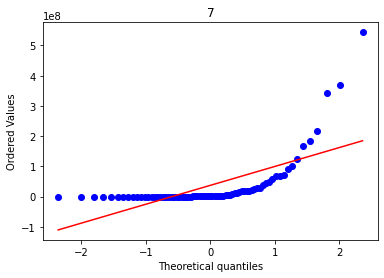

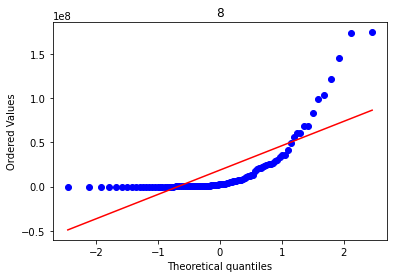

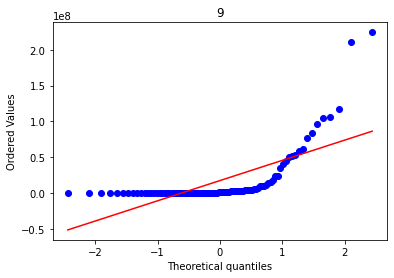

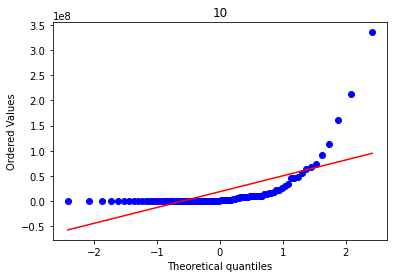

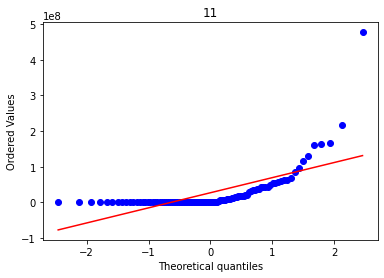

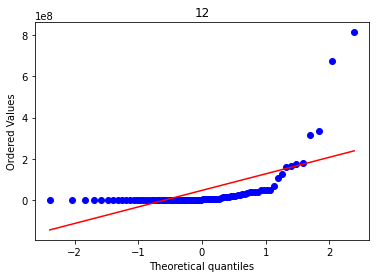

1 5.1000793865885186e-11
2 2.764173529741661e-18
3 1.5663898431780049e-18
4 2.0304800841977945e-17
5 7.383262608160105e-17
6 4.299467689139843e-18
7 4.567961016632401e-15
8 2.1935747760316177e-15
9 2.11011206693656e-16
10 5.3804730567120134e-17
11 3.196675873158128e-17
12 1.018460769075546e-16


In [67]:
for month, group in month_grouped:
    stats.probplot(group['Domestic_boxoffice'], dist="norm", plot=plt)
    plt.title(month)
    plt.show()

for month, group in month_grouped:
    w, p_value = stats.shapiro(group['Domestic_boxoffice'])
    print(month, p_value)

In [68]:
# Kruskal-Wallis

stat, p_value = kruskal(*[group['Domestic_boxoffice'] for name, group in month_grouped])

print('Kruskal-Wallis test:', p_value)

Kruskal-Wallis test: 0.3069223717912543


Note: p-value is larger than 0.05 here.

In [71]:
# Break down into genres

for genre in genres_all:
    movies_by_genre = get_movies_by_genre(genre)
    month_grouped = movies_by_genre.groupby('month')
    month_mean_revenue = month_grouped['Domestic_boxoffice'].mean()
    print(genre)
    
    stat, p_value = kruskal(*[group['Domestic_boxoffice'] for name, group in month_grouped])

    print('Kruskal-Wallis test:', p_value)

Family
Kruskal-Wallis test: 0.32905826769974916
Horror
Kruskal-Wallis test: 0.5295119114972101
Sport
Kruskal-Wallis test: 0.6435902129040787
History
Kruskal-Wallis test: 0.05917421077039509
Thriller
Kruskal-Wallis test: 0.9132246485813678
Animation
Kruskal-Wallis test: 0.7566755132856858
Drama
Kruskal-Wallis test: 0.09781605354859
War
Kruskal-Wallis test: 0.3878630193277497
Music
Kruskal-Wallis test: 0.6033687738600597
Sci-Fi
Kruskal-Wallis test: 0.6918245008489621
Biography
Kruskal-Wallis test: 0.4676331332405762
Fantasy
Kruskal-Wallis test: 0.73349537032552
Documentary
Kruskal-Wallis test: 0.3956549571095457
Mystery
Kruskal-Wallis test: 0.4446952006387077
Comedy
Kruskal-Wallis test: 0.32123444553025854
Western
Kruskal-Wallis test: 0.2946025292319608
Romance
Kruskal-Wallis test: 0.31347168298917605
Musical
Kruskal-Wallis test: 0.6122079756810048
Action
Kruskal-Wallis test: 0.5449838664144406
Adventure
Kruskal-Wallis test: 0.5677289711587554
Crime
Kruskal-Wallis test: 0.348874125538726

Note: All genres have p value larger than 0.05.

## 5. Runtime vs. revenue (overall and by genre)

In [93]:
movies_all[['runtime', 'runtime_num']] = movies_all['runtime'].str.split(expand=True)
movies_cp = movies_all.copy()
movies_cp = movies_cp.dropna()
movies_cp['runtime'] = movies_cp['runtime'].astype(int)
movies_cp.head()

,id,imdb_user_rating,movie,year,metascore,metacritic_user_rating,release_date,starring,director,genre,runtime,Year,Movie,Domestic_boxoffice,month,day,runtime_num
1,tt5083738,7.5,The Favourite,2018,91,7.7,November 23,"Basil Eidenbenz,Denise Mack,Emma Delves,Emma S...",Giorgos Lanthimos,"Biography,Drama,History,Comedy",119,2018,The Favourite,34366783,11,23,min
2,tt6217608,7.4,The Rider,2018,91,7.5,April 13,"Brady Jandreau,Cat Clifford,Derrick Janis,Greg...",Chloé Zhao,"Adventure,Drama,Comedy,Romance,Western,Music",104,2018,The Rider,2418679,4,13,min
3,tt7476236,8.0,Minding the Gap,2018,89,8.1,August 17,"Bing Liu,Kiere Johnson,Zack Mulligan",Bing Liu,Documentary,93,2018,Minding the Gap,11998,8,17,min
4,tt7014006,7.4,Eighth Grade,2018,89,7.9,July 13,"Catherine Oliviere,Daniel Zolghadri,Deborah Un...",Bo Burnham,"Drama,Comedy",93,2018,Eighth Grade,13539710,7,13,min
5,tt3409848,6.7,Zama,2018,89,7.4,April 13,"Carlos Defeo,Daniel Giménez Cacho,Daniel Veron...",Lucrecia Martel,Drama,115,2018,Zama,200181,4,13,min


In [95]:
# overall

spearmanr_analysis(movies_cp, 'runtime', 'Domestic_boxoffice')

(0.396532472330016, 9.772404219614183e-39)

In [97]:
# by genre

genre_dict = {'genre':[], 'rho':[], 'p_value':[], 'len':[]}
    
for genre in genres_all:
    movies_by_genre = movies_cp[movies_cp['genre'].str.contains(genre, na=False)]
    genre_dict['len'].append(len(movies_by_genre))
    genre_dict['genre'].append(genre)
        
    rho, pval = spearmanr_analysis(movies_by_genre, 'runtime', 'Domestic_boxoffice')
        
    genre_dict['rho'].append(rho)
    genre_dict['p_value'].append(pval)

pd.DataFrame.from_dict(genre_dict).sort_values('rho')

,genre,rho,p_value,len
15,Western,0.018237,9.601195e-01,10
20,Crime,0.164380,7.403078e-02,119
17,Musical,0.202598,3.108340e-01,27
12,Documentary,0.216895,1.283243e-02,131
7,War,0.242517,2.229116e-01,27
2,Sport,0.255444,2.637467e-01,21
3,History,0.298652,2.677352e-02,55
13,Mystery,0.300788,1.270812e-03,112
11,Fantasy,0.328224,4.934289e-04,109
4,Thriller,0.330551,5.097321e-08,259


## 6. Rating vs genre 2 (? the number of movies in different genres are different)
High rating, low genre; low rating, high genre

In [100]:
high_rating_imdb = movies_all['imdb_user_rating'].quantile(0.75)
low_rating_imdb = movies_all['imdb_user_rating'].quantile(0.25)

high_rating_critic = movies_all['metascore'].quantile(0.75)
low_rating_critic = movies_all['metascore'].quantile(0.25)

high_revenue = movies_all['Domestic_boxoffice'].quantile(0.75)
low_revenue = movies_all['Domestic_boxoffice'].quantile(0.25)

high_rating, low_rating, high_rating_critic, low_rating_critic, high_revenue, low_revenue

(7.0, 5.9, 74.0, 52.0, 17318007.0, 67343.0)

In [102]:
# high imdb, high revenue
hihr = movies_all_long[(movies_all_long['imdb_user_rating'] > high_rating_imdb) & (movies_all_long['Domestic_boxoffice'] > high_revenue)]

# high imdb, low revenue
hilr = movies_all_long[(movies_all_long['imdb_user_rating'] > high_rating_imdb) & (movies_all_long['Domestic_boxoffice'] < low_revenue)]

# high meta, high revenue
hmhr = movies_all_long[(movies_all_long['metascore'] > high_rating_critic) & (movies_all_long['Domestic_boxoffice'] > high_revenue)]

# high meta, low revenue
hmlr = movies_all_long[(movies_all_long['metascore'] > high_rating_critic) & (movies_all_long['Domestic_boxoffice'] < low_revenue)]

# low imdb, high revenue
lihr = movies_all_long[(movies_all_long['imdb_user_rating'] < low_rating_imdb) & (movies_all_long['Domestic_boxoffice'] > high_revenue)]

# low imdb, low revenue
lilr = movies_all_long[(movies_all_long['imdb_user_rating'] < low_rating_imdb) & (movies_all_long['Domestic_boxoffice'] < low_revenue)]

# low meta, high revenue
lmhr = movies_all_long[(movies_all_long['metascore'] < low_rating_critic) & (movies_all_long['Domestic_boxoffice'] > high_revenue)]

# low meta, low revenue
lmlr = movies_all_long[(movies_all_long['metascore'] < low_rating_critic) & (movies_all_long['Domestic_boxoffice'] < low_revenue)]


In [109]:
hihr.groupby('genre').count()['id'].sort_values(ascending=False)[:5]

genre
Drama        54
Comedy       32
Action       28
Thriller     25
Adventure    25
Name: id, dtype: int64

In [110]:
hilr.groupby('genre').count()['id'].sort_values(ascending=False)[:5]

genre
Documentary    33
Drama          11
Thriller        7
Mystery         4
Horror          4
Name: id, dtype: int64

In [111]:
hmhr.groupby('genre').count()['id'].sort_values(ascending=False)[:5]

genre
Drama        24
Comedy       13
Thriller     12
Adventure    10
Sci-Fi        9
Name: id, dtype: int64

In [112]:
hmlr.groupby('genre').count()['id'].sort_values(ascending=False)[:5]

genre
Documentary    32
Drama          29
Biography       4
Thriller        4
Comedy          4
Name: id, dtype: int64

In [113]:
lihr.groupby('genre').count()['id'].sort_values(ascending=False)[:5]

genre
Thriller     25
Action       24
Comedy       24
Adventure    24
Horror       23
Name: id, dtype: int64

In [114]:
lilr.groupby('genre').count()['id'].sort_values(ascending=False)[:5]

genre
Drama       46
Horror      20
Comedy      19
Thriller    18
Romance     12
Name: id, dtype: int64

In [115]:
lmhr.groupby('genre').count()['id'].sort_values(ascending=False)[:5]

genre
Action       45
Thriller     39
Adventure    39
Comedy       36
Drama        32
Name: id, dtype: int64

In [116]:
lmlr.groupby('genre').count()['id'].sort_values(ascending=False)[:5]

genre
Drama       27
Comedy      12
Romance      9
Thriller     8
Crime        7
Name: id, dtype: int64